In [1]:
import numpy as np  
import pandas as pd  
from pandas_datareader import data as web  
from scipy.stats import norm 
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
ticker = 'PG'  
data = pd.DataFrame()
data[ticker] = web.DataReader(ticker, data_source='yahoo', start='2007-1-1', end='2017-3-21')['Adj Close']

In [3]:
log_returns = np.log(1 + data.pct_change())

In [4]:
log_returns.tail()

,PG
Date,
2017-03-15,0.004386
2017-03-16,0.000438
2017-03-17,-0.004824
2017-03-20,0.002415
2017-03-21,-0.000329


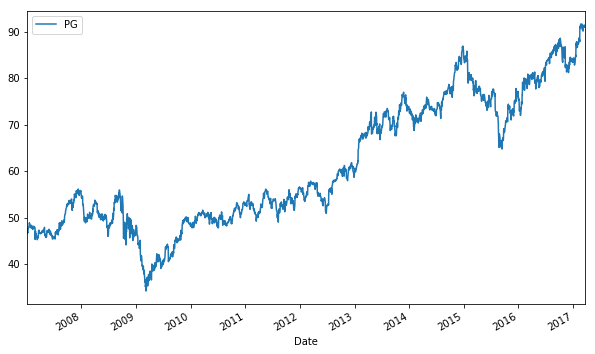

In [5]:
data.plot(figsize=(10, 6));

In [6]:
r = 0.025

In [7]:
stdev = log_returns.std() * 250 ** 0.5
stdev

PG    0.17655
dtype: float64

In [8]:
type(stdev)

pandas.core.series.Series

In [9]:
stdev = stdev.values
stdev

array([ 0.17655025])

In [10]:
T = 1.0 
t_intervals = 250 
delta_t = T / t_intervals  
iterations = 10000  

In [11]:
Z = np.random.standard_normal((t_intervals + 1, iterations))  
S = np.zeros_like(Z) 
S0 = data.iloc[-1]  
S[0] = S0 

for t in xrange(1, t_intervals + 1):
    S[t] = S[t-1] * np.exp((r - 0.5 * stdev ** 2) * delta_t + stdev * delta_t ** 0.5 * Z[t])

In [12]:
S

array([[  91.190002  ,   91.190002  ,   91.190002  , ...,   91.190002  ,
          91.190002  ,   91.190002  ],
       [  90.85756671,   89.91464638,   91.30178901, ...,   91.3841097 ,
          91.61363202,   89.30774433],
       [  92.37046894,   90.05473843,   90.38458118, ...,   90.03775976,
          93.19024325,   90.17979061],
       ..., 
       [  88.04766326,   89.43780411,   95.75203802, ...,  103.67289949,
          88.12957193,   90.17438035],
       [  87.87542586,   90.30462259,   96.62200752, ...,  105.62921733,
          88.36546523,   90.97137031],
       [  88.09749498,   89.37981776,   95.25547341, ...,  103.43886853,
          89.35150949,   89.62898934]])

In [13]:
S.shape

(251L, 10000L)

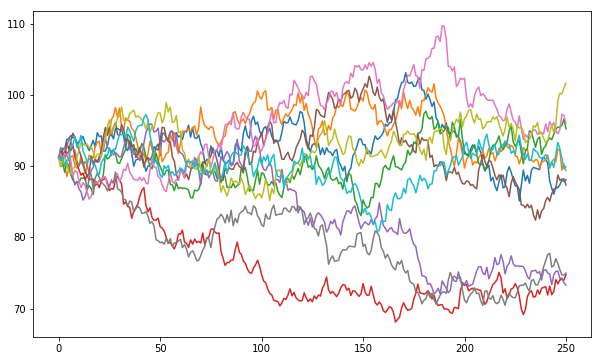

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(S[:, :10]);

******

In [15]:
p = np.maximum(S[-1] - 110, 0)

In [16]:
p

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

In [17]:
p.shape

(10000L,)

In [18]:
C = np.exp(-r * T) * np.sum(p) / iterations
C  

1.7072495778991614